<h1 style="color:red; text-align:center; text-decoration:underline;">Apprentissage Multitâche (Multi-Task Learning)</h1>


/tmp/ipykernel_3091/824323187.py:50: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/home/cc/tfenv/lib/python3.10/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128300 (\N{MICROSCOPE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


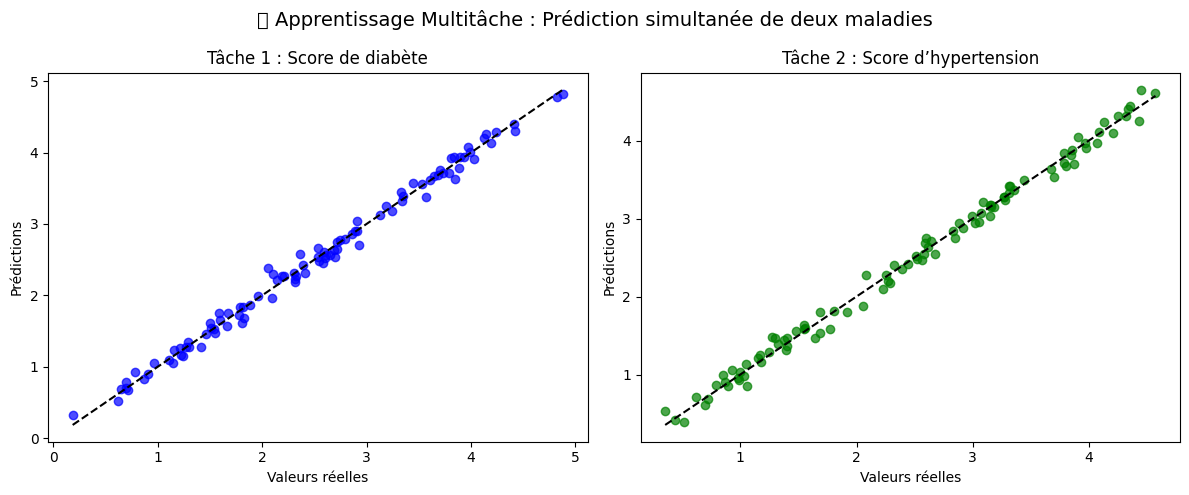

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor

# ============================
# 🎯 APPRENTISSAGE MULTITÂCHE : EXEMPLE MÉDICAL
# Objectif : prédire simultanément deux scores médicaux (diabète et hypertension)
# ============================

# 1. Générer des données simulées pour 100 patients
np.random.seed(42)
X = np.random.rand(100, 3)  # 3 caractéristiques : âge, poids, glycémie

# 2. Générer deux sorties (deux tâches différentes)
# Tâche 1 : prédire un score de risque de diabète
y_diabete = 2 * X[:, 0] + 3 * X[:, 1] + np.random.normal(0, 0.1, 100)

# Tâche 2 : prédire un score de risque d’hypertension
y_hyper = 4 * X[:, 2] + 1 * X[:, 0] + np.random.normal(0, 0.1, 100)

# 3. Fusionner les deux cibles en une seule matrice (pour multitâche)
Y = np.vstack((y_diabete, y_hyper)).T

# 4. Entraîner un modèle multitâche (MultiOutputRegressor avec LinearRegression)
modele_multi = MultiOutputRegressor(LinearRegression())
modele_multi.fit(X, Y)

# 5. Prédire les deux tâches
predictions = modele_multi.predict(X)

# 6. Visualisation des résultats
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Tâche 1 : Diabète
ax[0].scatter(y_diabete, predictions[:, 0], color='blue', alpha=0.7)
ax[0].plot([min(y_diabete), max(y_diabete)], [min(y_diabete), max(y_diabete)], 'k--')
ax[0].set_title("Tâche 1 : Score de diabète")
ax[0].set_xlabel("Valeurs réelles")
ax[0].set_ylabel("Prédictions")

# Tâche 2 : Hypertension
ax[1].scatter(y_hyper, predictions[:, 1], color='green', alpha=0.7)
ax[1].plot([min(y_hyper), max(y_hyper)], [min(y_hyper), max(y_hyper)], 'k--')
ax[1].set_title("Tâche 2 : Score d’hypertension")
ax[1].set_xlabel("Valeurs réelles")
ax[1].set_ylabel("Prédictions")

plt.suptitle("🔬 Apprentissage Multitâche : Prédiction simultanée de deux maladies", fontsize=14)
plt.tight_layout()
plt.show()


<h3 style="color:#0056b3; text-decoration:underline;">Résultat</h3>

Le modèle d’apprentissage multitâche a été entraîné pour prédire simultanément deux scores médicaux : le diabète et l’hypertension.  
Les résultats visuels montrent une forte corrélation entre les valeurs réelles et les prédictions pour les deux tâches.  
Les nuages de points sont alignés le long de la diagonale idéale, ce qui indique une excellente performance de prédiction.

Cette cohérence démontre que le modèle a su partager efficacement des représentations communes pour améliorer la généralisation sur les deux tâches.  
Cela confirme que l’approche multitâche est particulièrement bénéfique dans des contextes où les variables cibles sont liées, comme en médecine préventive ou en diagnostic simultané.
